<h1> Lecture 22

Data Science 8, Summer 2021 </h1>

<h3>
<b>
<ul>
<li>Distributions  </li><br>
    <ul> 
        <li>Measures of Centrality: Mean and Median</li><br>
        <li>Measures of Spread: Variance and Standard Deviation</li>
    </ul>
</ul>
</b>
</h3>

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
#Syntax: ![title](image_name.png)
from IPython.display import Image

# Center

### Average (Mean)

There are many different ways we can calculate the mean

In [2]:
values = make_array(2, 3, 3, 9)
values

array([2, 3, 3, 9])

In [3]:
sum(values)/len(values)

4.25

In [4]:
np.average(values)

4.25

In [5]:
np.mean(values)

4.25

In [6]:
(2 + 3 + 3 + 9)/4

4.25

In [7]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [8]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


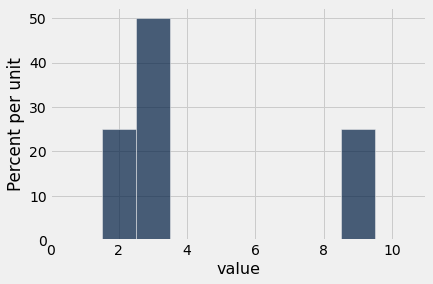

In [9]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist('value', bins = bins_for_display)

In [10]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

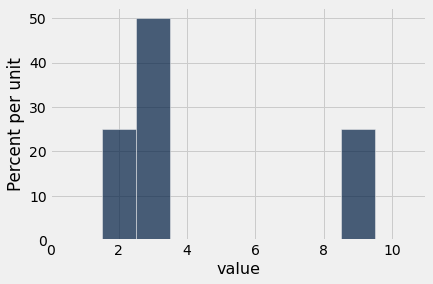

In [11]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [12]:
np.average(values)

4.25

In [13]:
# Multiplying numerator and denominator by 10 didn't affect the mean
np.average(new_vals)

4.25

### Median

In [14]:
values

array([2, 3, 3, 9])

In [15]:
percentile(50, values)

3

In [16]:
np.median(values)

3.0

# Spread

In [17]:
array1 = make_array(0,0,0,0,0,10,10,10,10,10) #five 0s, five 10s
array2 = make_array(5,5,5,5,5,5,5,5,5,5) #ten 5s
array3 = make_array(0,2,3,4,5,5,6,7,8,10)

In [18]:
example_table = Table().with_columns("Array 1", array1,
                    "Array 2", array2,
                    "Array 3", array3)

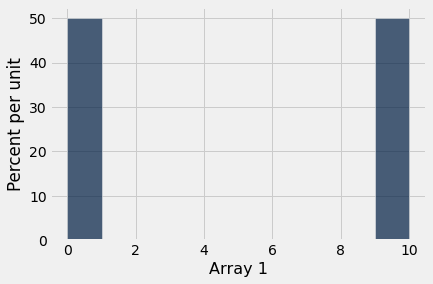

In [19]:
example_table.hist("Array 1")

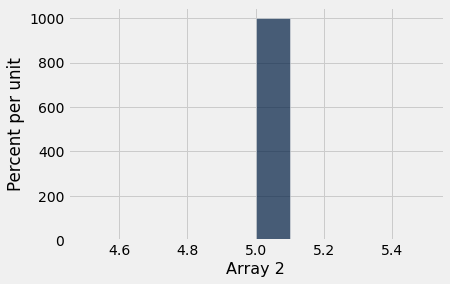

In [20]:
example_table.hist("Array 2")

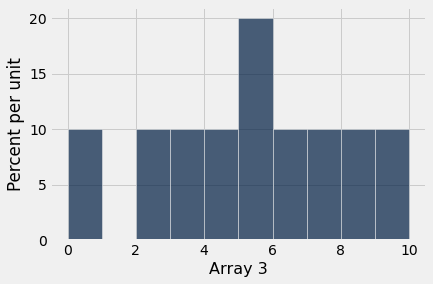

In [21]:
example_table.hist("Array 3")

Mean and range for all 3 arrays doesn't tell us much about the shape of the distribution

## Standard Deviation ##

In [22]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [23]:
average_value = np.average(sd_table.column(0))
average_value

4.25

How far away from the mean is each of these values?

In [24]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [25]:
sum(deviations)

0.0

In [26]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [27]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [28]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [29]:
np.std(values)

2.7726341266023544

In [30]:
np.std(array1)

5.0

In [31]:
np.std(array2)

0.0

In [32]:
np.std(array3)

2.792848008753788

## Chebyshev's Bound

In [33]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


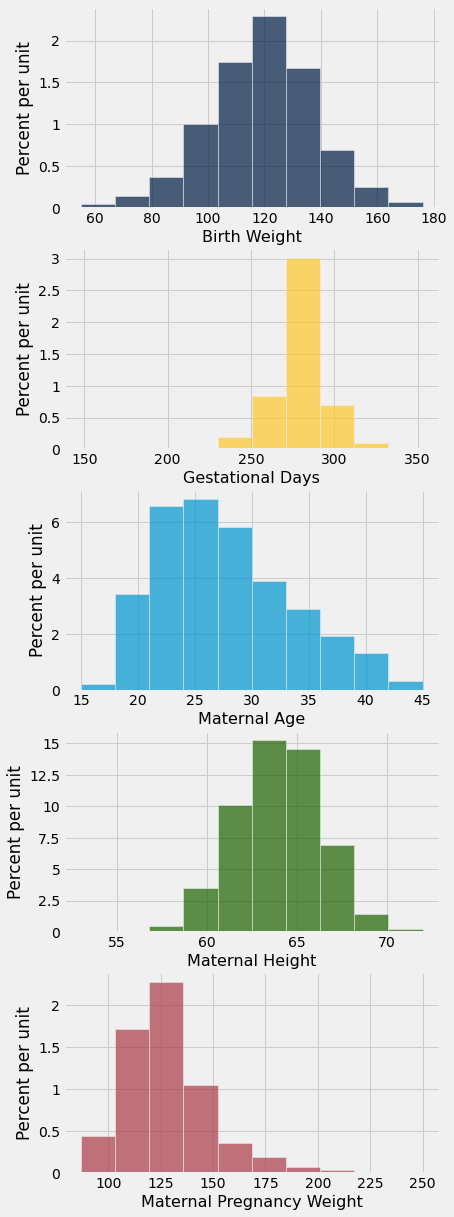

In [34]:
births.drop('Maternal Smoker').hist(overlay = False)

In [35]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
median_numpy=np.median(mpw)
median_percentile_50=percentile(50,mpw)
np.round(mean,2), np.round(sd,2), median_numpy, median_percentile_50

(128.48, 20.73, 125.0, 125)

In [36]:
within_3_SDs = births.where(
    'Maternal Pregnancy Weight', 
    are.between(mean - 3*sd, mean + 3*sd))

In [37]:
# Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [38]:
# Chebyshev's bound: 
# The proportion we calculated above should be at least

1 - 1/(3**2)

0.8888888888888888

In [39]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [40]:
# See if Chebyshev's bounds work for distributions with various shapes

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Gestational Days
Average plus or minus 2 SDs: 93.78 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs: 99.57 % of the data
Average plus or minus 5 SDs: 99.83 % of the data

Maternal Age
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.91 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Height
Average plus or minus 2 SDs: 97.19 % of the data
Average plus or minus 3 SDs: 99.66 % of the data
Average plus or minus 4 SDs: 99.91 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs:

## Standard Units ##

In [41]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [42]:
ages = births.column('Maternal Age')

In [43]:
ages_standard_units = standard_units(ages)

In [44]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

## Discussion Question

In [45]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


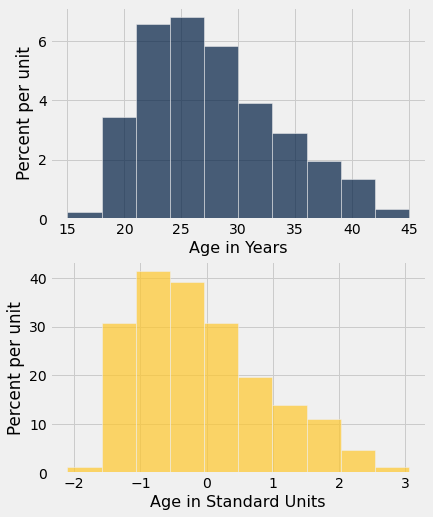

In [46]:
both.hist(overlay = False)

In [47]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

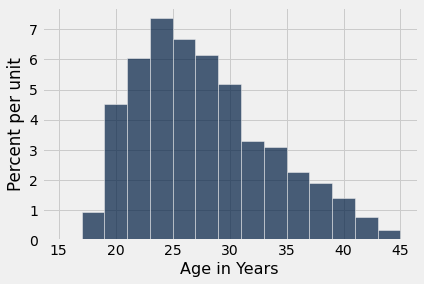

In [48]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

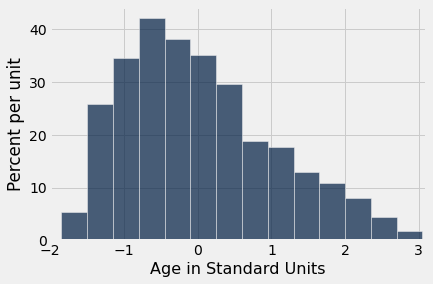

In [49]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell Shaped Curves

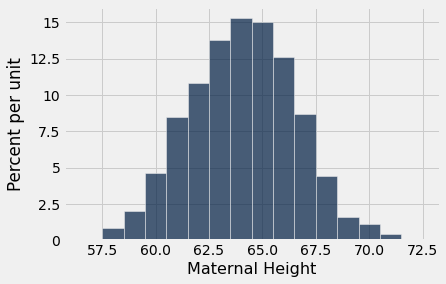

In [50]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [51]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

In [52]:
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

(66.57442918883797, 61.52437830690309)